# Title: Heart Disease Predictions Case Study
`Author:`[Muhammad Nauman Sair](https://www.linkedin.com/in/muhammad-nauman-sair/)\
`Date:` 12 January 2024\
`Dataset:` [Heart_Disease_Uci](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 
**They would be:**
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objectives:
We will fill this after doing EDA.

### Import the Libraries
Let's start the project by importing all the libraries that we will need in this project.

In [206]:
# Import Libraries
# 1. To handle the dataset
import numpy as np
import pandas as pd

# 2. To Visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#3. To pre-process the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# Import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 4. Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 5. Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


## Load the DataSet


In [175]:
# First Approach to load the data set from the Saved Dataset in a Specified folder
df = pd.read_csv(r'C:\desktop\python\AI-AND-DS\data\heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [176]:
# # Second Approach to load the data set from UCI Repo
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# heart_disease = fetch_ucirepo(id=45) 

# # data (as pandas dataframes) 
# X = heart_disease.data.features 
# y = heart_disease.data.targets 
  
# # metadata 
# print(heart_disease.metadata) 
  
# # variable information 
# print(heart_disease.variables) 

# # print first 5 rows
# X.head()

## Exploratory Data Analysis on data imported with `Frist Approach`

### Explore each column

In [177]:
# Exploring the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [178]:
# Data Shape
df.shape

(920, 16)

Explore the Age Column


In [179]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

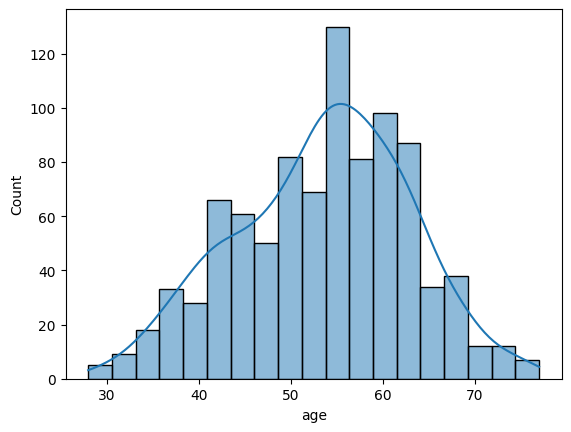

In [180]:
# Draw a sns histogram of the age column to see the distribution
sns.histplot(df['age'], kde=True)


Mean: 53.51086956521739
Median: 54.0
Mode: 54


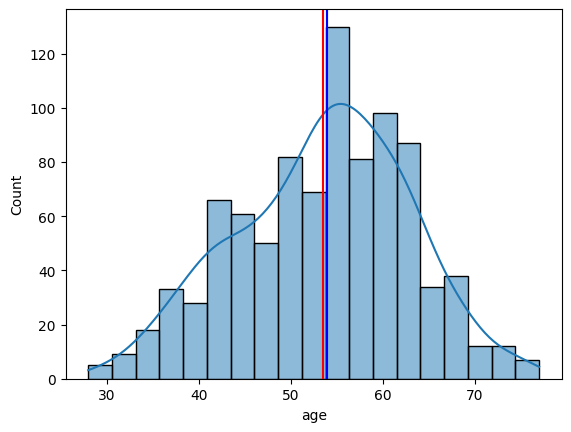

In [181]:
# Plot the mean, median, and mode of the age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the values of mean, median, and mode of the age column
print("Mean:", df['age'].mean())
print("Median:", df['age'].median())
print("Mode:", df['age'].mode()[0])



Let's explore the gender based dustribution of the dataset for age column.

In [182]:
# Plot the histogram of the age column by use of plotly and coloring this by sex column
import plotly.express as px

fig = px.histogram(df, x='age', color='sex')
fig.show()

In [183]:
# Find the values of Sex Column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [184]:
# Differentiate the values of sex column
male_counts = 726
female_counts = 194
total_counts = male_counts + female_counts
male_percentage = (male_counts / total_counts) * 100
female_percentage = (female_counts / total_counts) * 100

# print the resultt in 2 decimal places
print(f"Male percentage: {male_percentage:.2f}%")
print(f"Female percentage: {female_percentage:.2f}%")

# Differance between male and female
difference = male_percentage - female_percentage
print(f"Difference between male and female percentages: {difference:.2f}%")

Male percentage: 78.91%
Female percentage: 21.09%
Difference between male and female percentages: 57.83%


Lets deal with the dataset columns

In [185]:
# find the unique values in the dataset using the unique() function
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [186]:
# Count the unique values in the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [187]:
# Count plot of the dataset column in different colors in plotly with counts in the legend
fig = px.histogram(df, x='dataset', color='sex')
fig.show()



In [188]:
# print the value count of dataset column based on the sex
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

Age Column exploration within the location dataset column

In [189]:
# plot the age distribution of each dataset
fig = px.histogram(df, x='age', color='dataset')
fig.show()

# Mean, median, and mode of age of the patients in the dataset
# Sort the mean values in ascending order
print(f"Mean of the  Dataset: {df.groupby('dataset')['age'].mean().sort_values()}")
print("____________________________________________________________")
print(f"Median of the  Dataset: {df.groupby('dataset')['age'].median().sort_values()}")
print("____________________________________________________________")
print(f"Mode of the  Dataset: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")

Mean of the  Dataset: dataset
Hungary          47.894198
Cleveland        54.351974
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
____________________________________________________________
Median of the  Dataset: dataset
Hungary          49.0
Cleveland        55.5
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
____________________________________________________________
Mode of the  Dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


Explore the cp (ChestPain) column

In [190]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [191]:
# count plot of cp column grouped by sex
fig = px.histogram(df, x='cp', color='sex')
fig.show()

# value count of cp column based on sex
df.groupby('sex')['cp'].value_counts()

sex     cp             
Female  asymptomatic        70
        atypical angina     61
        non-anginal         53
        typical angina      10
Male    asymptomatic       426
        non-anginal        151
        atypical angina    113
        typical angina      36
Name: count, dtype: int64

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64

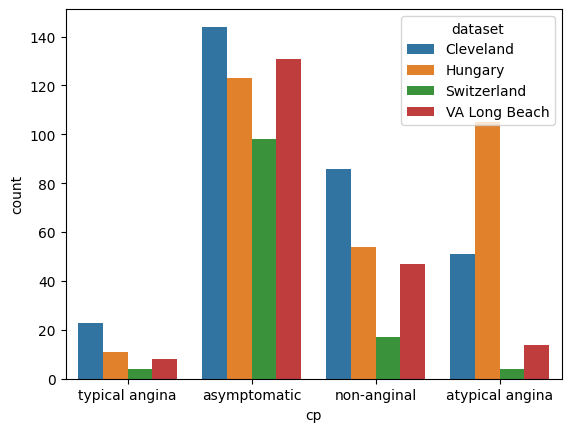

In [192]:
# sns count plot of cp column grouped by dataset
sns.countplot(x='cp', hue='dataset', data=df)

# value count of cp column based on sex
df.groupby('dataset')['cp'].value_counts()

In [193]:
# plot the age distribution of each cp  
fig = px.histogram(df, x='age', color='cp')
fig.show()

# Mean, median, and mode of age of the patients in the dataset
# Sort the mean values in ascending order
print(f"Mean of the  ChestPain: {df.groupby('cp')['age'].mean().sort_values()}")
print("____________________________________________________________")
print(f"Median of the  ChestPain: {df.groupby('cp')['age'].median().sort_values()}")
print("____________________________________________________________")
print(f"Mode of the  ChestPain: {df.groupby('cp')['age'].agg(pd.Series.mode)}")

Mean of the  ChestPain: cp
atypical angina    49.241379
non-anginal        53.333333
typical angina     54.826087
asymptomatic       54.959677
Name: age, dtype: float64
____________________________________________________________
Median of the  ChestPain: cp
atypical angina    50.5
non-anginal        53.5
asymptomatic       56.0
typical angina     59.0
Name: age, dtype: float64
____________________________________________________________
Mode of the  ChestPain: cp
asymptomatic             57
atypical angina          54
non-anginal        [51, 54]
typical angina           62
Name: age, dtype: object


#### Let's explore the trestbps (Resting blood pressure) column:
The Normal resting blood pressure is 120/80 mmHg. It will consider high if Systolic is greater than 120 mmHg and low if Diastolic is less than 60 mmHg.


<Axes: xlabel='trestbps', ylabel='Count'>

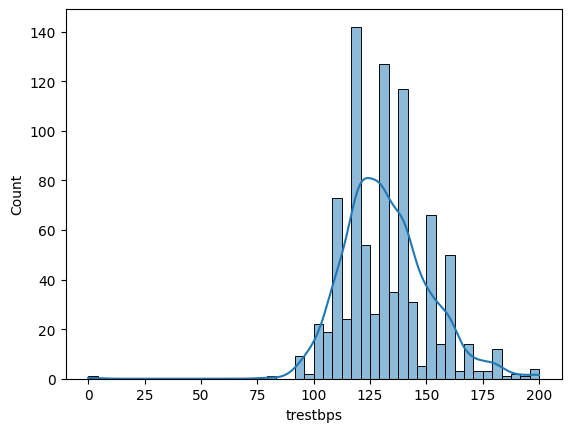

In [194]:
# histplot for trestbps column without the bp_category
sns.histplot(data=df, x='trestbps', kde=True)

In [195]:
# Deal with missing values in the trestbps column with iterateative imputer
imputer = IterativeImputer(max_iter=10, random_state=42)

#if the imputer on trestbps column
df['trestbps'] = imputer.fit_transform(df[['trestbps']])

# check and print the missing values in the trestbps column
print(f'Missing values in trestbps column: {df["trestbps"].isnull().sum()}')

Missing values in trestbps column: 0


In [196]:
# Find the percentage ofmissing values in the df columns and print the missing values in assending order
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [197]:
# find the numeric columns with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [198]:
# impute the missing values for chol, thalch, oldpeak, ca - the numeric columns
imputer_2 = IterativeImputer(max_iter=10, random_state=42)
df[['chol', 'thalch', 'oldpeak', 'ca']] = imputer_2.fit_transform(df[['chol', 'thalch', 'oldpeak', 'ca']])


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Let's Impute the missing values on Object Columns by using ML Models

In [200]:
# Impute the missing values for object columns with mode
# analyze the 'thal' column
print(df['thal'].value_counts())

# print the missing values in the thal column
print(f'Missing values in thal column: {df["thal"].isnull().sum()}')

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64
Missing values in thal column: 486


In [201]:
# identify the features with missing values in more than 10% of the data
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [226]:
# # Seprate the columns by their data types
# numeric_cols = df.select_dtypes(include='number').columns.tolist()
# numeric_cols

# categorical_cols = df.select_dtypes(include='object').columns.tolist()
# categorical_cols

# bool_cols = df.select_dtypes(include='bool').columns.tolist()
# bool_cols

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [232]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

#### Define the function to impute the missing values

In [235]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [236]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [237]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 0.0%
The feature 'fbs' has been imputed with 80.43 accuracy

Missing Values restecg : 0.0%
The feature 'restecg' has been imputed with 60.33 accuracy

Missing Values exang : 0.0%
The feature 'exang' has been imputed with 81.52 accuracy

Missing Values slope : 0.0%
The feature 'slope' has been imputed with 80.43 accuracy

Missing Values thal : 0.0%
The feature 'thal' has been imputed with 83.7 accuracy



In [238]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#### Dealing with outliers

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


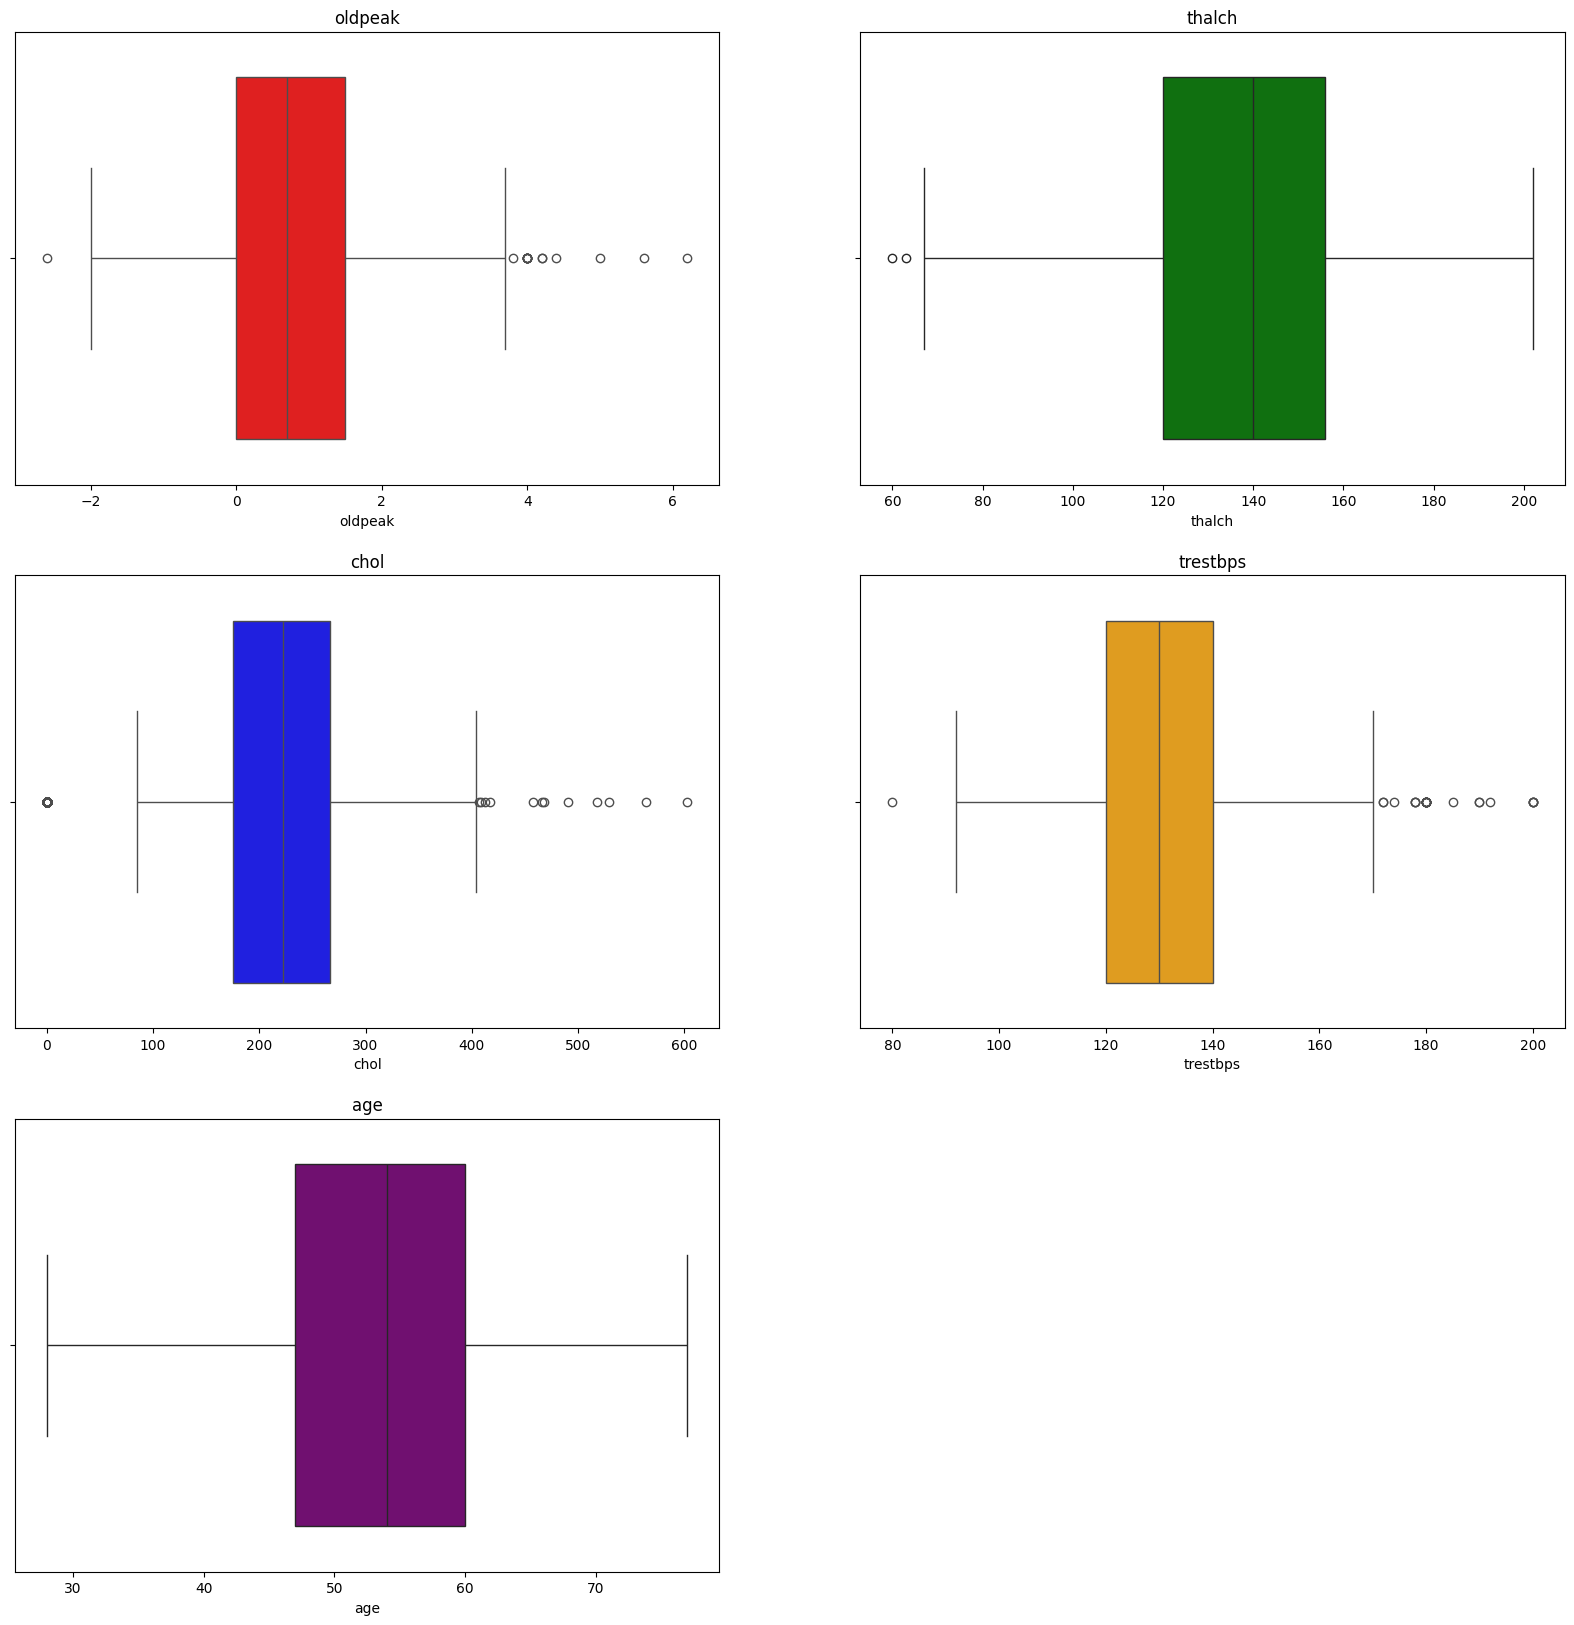

In [245]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [244]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [246]:
# print the row from df where chol value is 0
df[df['chol'] == 0]


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.000000,0.0,False,normal,127.000000,False,0.700000,upsloping,0.585346,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.000000,0.0,False,normal,154.000000,False,0.200000,upsloping,0.283606,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,132.132404,0.0,False,normal,130.000000,True,0.757452,flat,0.566071,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.000000,0.0,False,normal,125.000000,True,1.000000,flat,0.640861,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.000000,0.0,False,normal,166.000000,False,2.800000,upsloping,0.505422,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.000000,0.0,False,normal,120.000000,False,0.500000,upsloping,0.622004,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.000000,0.0,True,st-t abnormality,160.000000,False,3.000000,flat,0.583685,reversable defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.000000,0.0,False,st-t abnormality,110.000000,True,1.000000,downsloping,0.773462,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,132.132404,0.0,False,lv hypertrophy,126.212428,True,0.785303,flat,0.603066,reversable defect,1


No need to remove Chol rows as we only had 30 rows with missing values at the start of analysis. Now after imputation we have 171 rows where Chol is 0, which is acceptable. 

In [243]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


----

## Marchine Learning

In [249]:
# Explore the data
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [250]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The target column is `num` whihc is the predicted artibute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart disases.
* 0 = no heart disease
* 1 = mild heart disease
* 2 = moderate heart disease
* 3 = severe heart disease
* 4 = critical heart disease

In [251]:
# Split the dataset into training and testing sets
X = df.drop(['num'], axis=1)
y = df['num']

# encode X data with label encoder
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# splict the data into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# enlist all the models that you will use to predict the heart disease

    * Logistic Regression
    * KNN
    * Decision Tree
    * Random Forest
    * XGBoost
    * Adaboost
    * GradienBoost Classifier
    * nive_bayes
    * SVM
    * Lightgbm
    * catboost
  


In [257]:
# !pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.3 MB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.3 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 10.6 MB/s eta 0:00:00


In [258]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [265]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('Light GBM', LGBMClassifier(random_state=42)),
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('./saved-models/heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.6380952380952382
Test Accuracy: 0.6086956521739131

Model: Gradient Boosting
Cross-validation Accuracy: 0.616326530612245
Test Accuracy: 0.6413043478260869

Model: Support Vector Machine
Cross-validation Accuracy: 0.582312925170068
Test Accuracy: 0.5815217391304348

Model: Logistic Regression
Cross-validation Accuracy: 0.5210884353741497
Test Accuracy: 0.4782608695652174

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5809523809523809
Test Accuracy: 0.592391304347826

Model: Decision Tree
Cross-validation Accuracy: 0.5646258503401361
Test Accuracy: 0.625

Model: Ada Boost
Cross-validation Accuracy: 0.5741496598639456
Test Accuracy: 0.5217391304347826

Model: XG Boost
Cross-validation Accuracy: 0.6136054421768706
Test Accuracy: 0.6304347826086957

Model: Naive Bayes
Cross-validation Accuracy: 0.5619047619047619
Test Accuracy: 0.5217391304347826

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing wa

In [126]:
# find the value count of trestbps column
df['trestbps'].value_counts()

# binning the trestbps column
# Define bin edges
bins = [0, 90, 120, 129, 139, 180, float('inf')]

# Define bin labels
labels = ['Low BP', 'Normal BP', 'Elevated BP', 'Hypertension BP', 'Hypertensive Crisis', 'Extreme Hypertension']

# Create a new column 'bp_category' based on the binning
df['bp_category'] = pd.cut(df['trestbps'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(df[['trestbps', 'bp_category']])


       trestbps          bp_category
0    145.000000  Hypertensive Crisis
1    160.000000  Hypertensive Crisis
2    120.000000          Elevated BP
3    130.000000      Hypertension BP
4    130.000000      Hypertension BP
..          ...                  ...
915  127.000000          Elevated BP
916  132.132404      Hypertension BP
917  122.000000          Elevated BP
918  132.132404      Hypertension BP
919  120.000000          Elevated BP

[920 rows x 2 columns]


<Axes: xlabel='trestbps', ylabel='Count'>

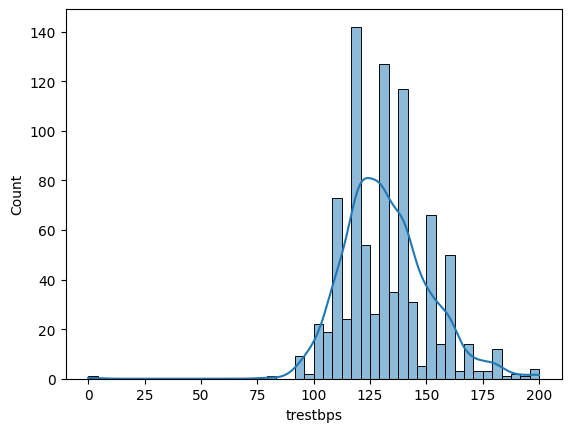

#### Outputs:
1. The minimum age to have a heart disease starts from 28 years old.
2. The most people get heart disease at the age of 53-54 years.
3. Most fo the males and females get the heart disease at the age of 54-55 years.
4. 79% of Male get more heart disease as compare to 21% female.
5. 58% of males have higher rate of get heart disease as compare to females.
6. We have highest number of people from Cleveland 304 and lowest from Switzerland 123 with heart disease.
   1. The highest number of female (97) count belongs to Cleveland and lowest (6) number from VA Long Beach.
   2. The highest number of male (212) count belongs to Hungary and lowest (113) number from Switzerland.
7. Based on (average: Meand and Median) the people of VA Long Beach get heart disease later in the age, whereas Hungary people get the heart disease at early age.
8. Angina Types with Sex Counts
      1. `asymptomatic`       496 (Males: 426, Females: 70)
         Most people belongs to Cleveland, and less from Switzerland
         Average age where people have no pain is between 54 to 56 years of age.
      2. `non-anginal`        204 (Males: 151, Females: 53)
         Most people belongs to Cleveland, and less from Switzerland
         Average age where people have non-anginal is between 53 to 54 years of age.
      3. `atypical angina `   174 (Males: 113, Females: 51)
         Most people belongs to Hungary, and less from Switzerland
         Average age where people have atypical angina is between 49 to 51 years of age.
      4. `typical angina`      46 (Males: 36, Females: 10)
         Most people belongs to Cleveland, and less from Switzerland
         Average age where people have typical angina is between 54 to 59 years of age.

13. Random Forest Model is the best from all the models.

# How can you improve the accuracy of this or any other model?
`Hint1`:
1. Feature Engineering
2. Selective features, instead of using all features
3. data pre proecessing (scaling or normalization)
4. hyperparameter tuning
   1. ensemble learning (stacking, bagging, boosting)
5. use different models.

`Hint2`: 
Create a function to select the best hyper-parameter tuned model for multiclass classification on any kind of data, and then use that function to select the best model for this dataset.

- Pipeline: Data preprocess, Feature Engineering, Feature Selection, Hyperparameter Tuning, Model Selection, application and evaluation, make figures.